In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import os, glob, inspect, sys

from sklearn.preprocessing import MinMaxScaler, StandardScaler

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/marie-anne/code/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

In [120]:
clean_tube = os.path.join(os.path.dirname(os.getcwd()),'../Data/Cleaned_data/TUBE_ut_param_mean.csv')

tep_tube = pd.read_csv(clean_tube, index_col=0)


In [121]:
def plot_barplot(labels,heights,error,title_text):
    fig, ax = plt.subplots()
    ax.bar(labels,heights,yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color="gray")
    ax.set_yscale('log')
    ax.set_title(title_text)
    ax.set_ylabel('Thermoelectric power (uV/C)')
    plt.xticks(rotation=45)
    plt.show()

In [122]:
tep_tube_unknown = tep_tube[:8]
tep_tube_known = tep_tube[8:]

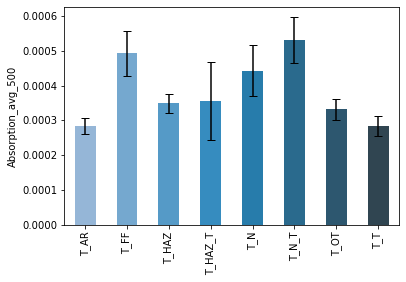

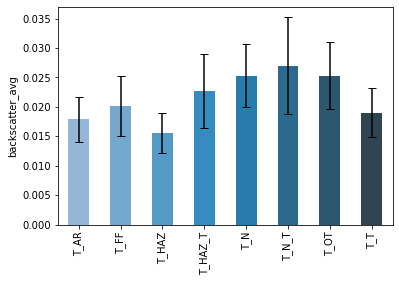

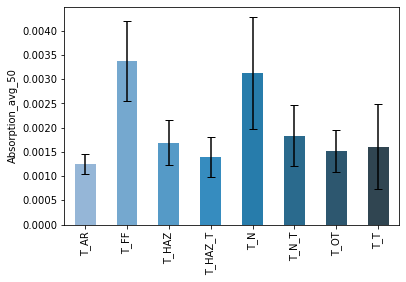

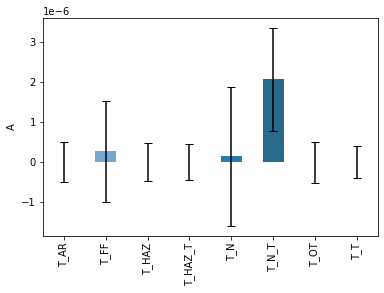

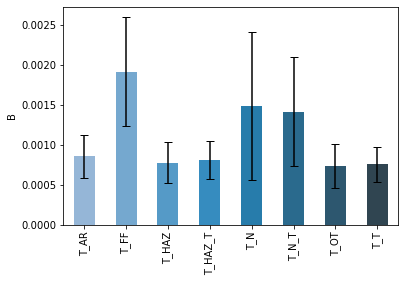

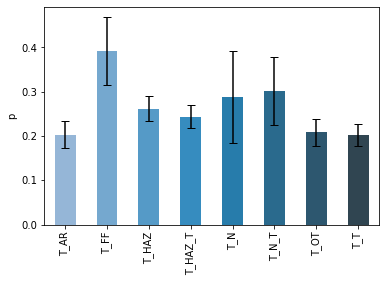

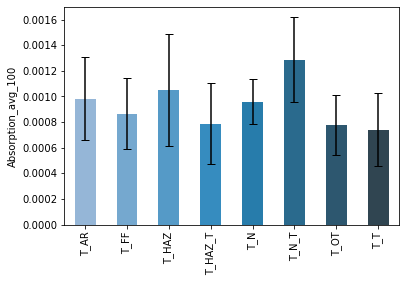

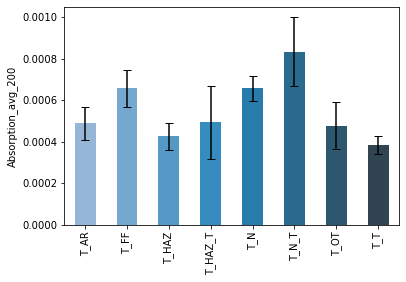

In [140]:
for col in range(len(tep_tube_known.columns)):
    if col%2 == 0:
        tep_tube_known.iloc[:, col].plot(kind='bar', ylabel=tep_tube_unknown.columns[col] ,
                                        yerr = tep_tube_known.iloc[:, col+1].to_list(), 
                                        capsize=4, color=sns.color_palette('PuBu_d', 8))
    plt.show()